In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pycaret.classification import *
import phik

In [8]:
#Load data from the folder data
df = pd.read_csv('../data/Loan_Default.csv')

interval columns not set, guessing: ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


c:\Users\LP00035\anaconda3\envs\mlflow\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable year for analysis 1. Dropping this column
  warnings.warn(


<Axes: >

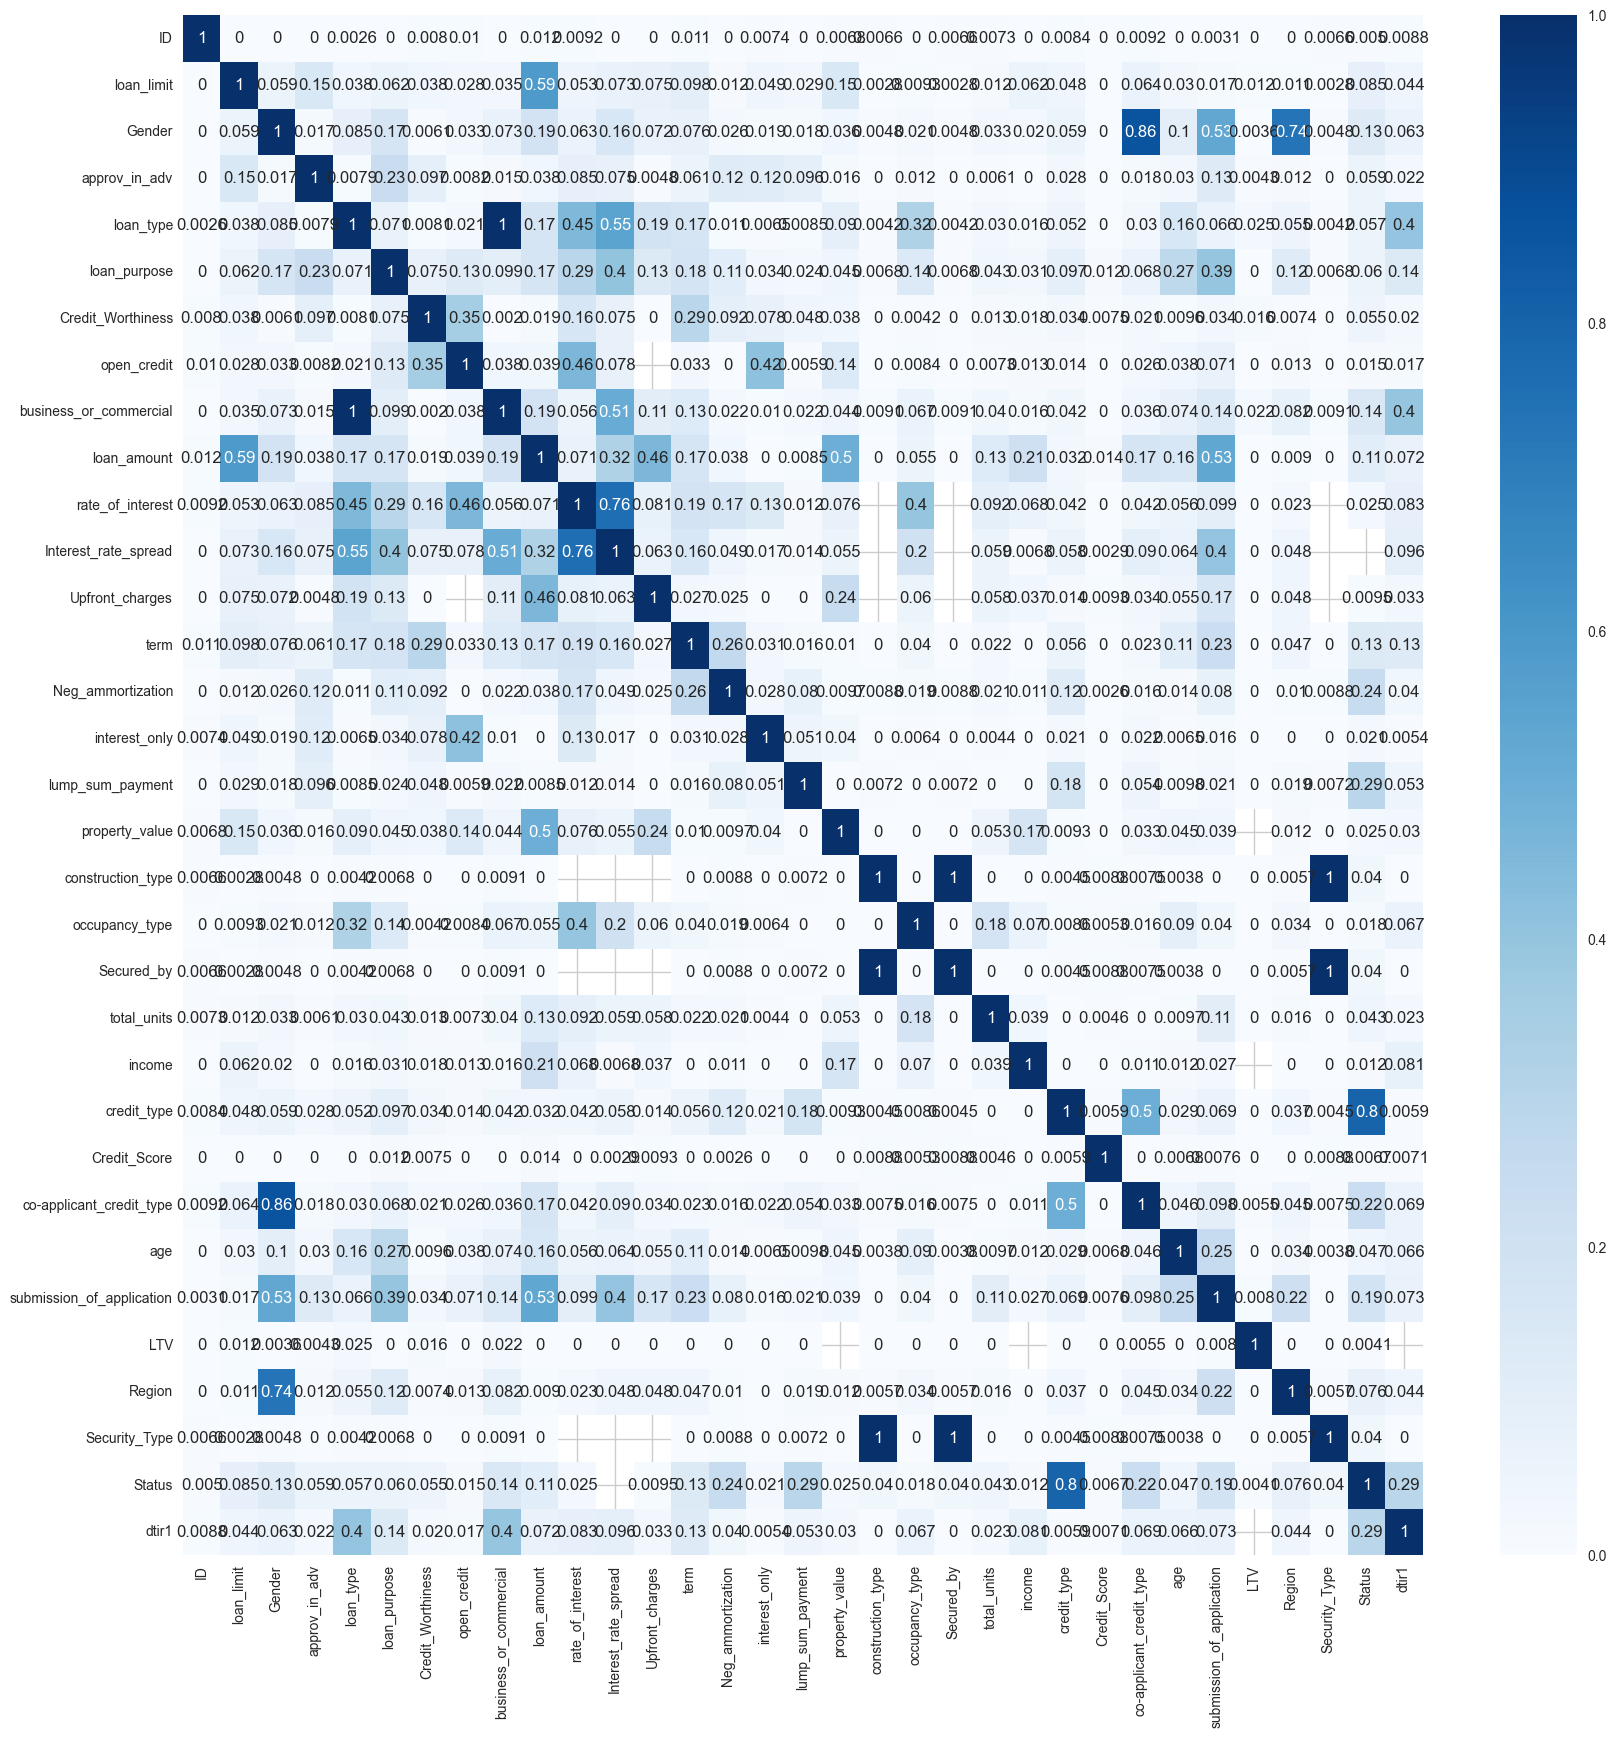

In [19]:
# Realizar un EDA basico
plt.figure(figsize=(20, 20))
sns.heatmap(df.phik_matrix(), cmap='Blues', annot=True)

In [21]:
# revisar el shape del dataframe
df.shape

(148670, 34)

In [23]:
# enable to see all columns of the dataframe
pd.set_option('display.max_columns', None)

In [25]:
# revisar el numero de missing values
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [66]:
# create a function to make a chi-2 test hypothesis
def phik_matriz(df : pd.DataFrame) -> list:
    df = df.drop(['ID'], axis = 1)
    matrix = df.phik_matrix()
    val = matrix.query('Status > 0.1').index.tolist()
    return val

In [67]:
a = phik_matriz(df)

interval columns not set, guessing: ['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


c:\Users\LP00035\anaconda3\envs\mlflow\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable year for analysis 1. Dropping this column
  warnings.warn(


In [68]:
# filter data only with useful columns
df_f = df[a]

In [69]:
# test models with pycaret
data = setup(data = df_f, target = 'Status')

,Description,Value
0,Session id,3846
1,Target,Status
2,Target type,Binary
3,Original data shape,"(148670, 11)"
4,Transformed data shape,"(148670, 17)"
5,Transformed train set shape,"(104069, 17)"
6,Transformed test set shape,"(44601, 17)"
7,Ordinal features,5
8,Numeric features,3
9,Categorical features,7


In [70]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8708,0.8528,0.5212,0.9197,0.6653,0.5926,0.6294,1.3470
gbc,Gradient Boosting Classifier,0.8701,0.8526,0.5066,0.9377,0.6578,0.5862,0.6286,4.3920
ada,Ada Boost Classifier,0.8628,0.8475,0.5044,0.8920,0.6444,0.5673,0.6028,1.8490
lda,Linear Discriminant Analysis,0.8617,0.8208,0.4501,0.9760,0.6160,0.5453,0.6061,0.9390
ridge,Ridge Classifier,0.8607,0.0000,0.4431,0.9816,0.6105,0.5400,0.6035,0.8160
knn,K Neighbors Classifier,0.8377,0.7644,0.4758,0.7798,0.5909,0.4970,0.5206,5.5010
rf,Random Forest Classifier,0.8368,0.8107,0.5618,0.7151,0.6292,0.5265,0.5328,5.0570
et,Extra Trees Classifier,0.8313,0.7882,0.5560,0.6979,0.6189,0.5123,0.5178,6.3920
dt,Decision Tree Classifier,0.8120,0.7336,0.5789,0.6287,0.6027,0.4798,0.4806,0.9290
lr,Logistic Regression,0.7536,0.5385,0.0000,0.0000,0.0000,0.0000,0.0000,1.4890


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [71]:
# import lgm model
from lightgbm import LGBMClassifier